# Scaling

데이터의 scale을 일치시키는 작업

> ex) 학습 데이터의 범위가 아래와 같다고 하자  
> $X_1$: 0 ~ 1  
> $X_2$: 100 ~ 1000  
> $X_3$: 10000 ~ 100000  

이 경우 모델은 $X_1$이나 $X_2$의 값이 크게 중요하지 않다고 생각할 수 있음

<br>

또한, 새로 들어오는 데이터가 아래와 같으며, 학습 데이터는 scale1과 같은 scale에서 학습됐다고 가정

|scale|data|
|-----|----|
|1    |[1, 2, 3, 4, 5]|
|2    |[10, 20, 30, 40, 50]|
|3    |[100, 200, 300, 400, 500]|

이 경우, 앞으로 들어올 test 데이터가 scale1의 범위를 갖으면 모델은 학습한 결과를 옳게 출력할 것  
하지만, scale2나 scale3에 대해서는 모델이 이전에 학습한 적이 없음  
따라서, 매우 저조한 퍼포먼스를 보이게 될 것

하지만 scale2와 3은 각각 10과 100으로 나누어 scale1과 동일하게 scale을 맞출 수 있음
이 경우, 모델은 올바르게 동작할 것

이와 같이 generalization 측면에서의 목적에서도 scaling은 중요

<br>

<span style="font-size: 15pt;"> 1. Normalization (정규화) </span>
- feature의 최솟값을 0으로 최댓값을 1로 만드는 작업
- 이상치에 매우 민감
- Equation:

$$ X_i^{\prime} = \frac {X_i -  X_{min}}{X_{max} - X_{min}}$$

- sklearn의 MinMaxScaler 이용
- 적용 방법

    > ```python
    > from sklearn.preprocessing import MinMaxScaler
    > minmax_scaler = MinMaxScaler()
    >
    > minmax_scaler.fit(data)             # 주어진 data를 통해 표준화시키는 방법 학습
    > minmax_scaler.transform(data)       # 학습된 object를 통해 data 표준화
    >
    > minmax_scaler.fit_transform(data)   # data를 표준화시키는 방법 학습과 동시에 주어진 data 표준화
    > ```

<br>

<span style="font-size: 15pt;"> 2. Standardization (표준화) </span>
- feature의 평균을 0, 분산을 1로 스케일링하는 방법
- 즉, 데이터의 분포를 표준정규분포로 만드는 작업
- 이상치에 매우 민감
- Equation:

$$ X_i^{\prime} = \frac {X_i -  \mu}{\sigma}$$

- sklearn의 StandardScaler 이용
- 적용 방법

    > ```python
    > from sklearn.preprocessing import StandardScaler
    > standard_scaler = StandardScaler()
    >
    > standard_scaler.fit(data)             # 주어진 data를 통해 표준화시키는 방법 학습
    > standard_scaler.transform(data)       # 학습된 object를 통해 data 표준화
    >
    > standard_scaler.fit_transform(data)   # data를 표준화시키는 방법 학습과 동시에 주어진 data 표준화
    > ```

<br>

<span style="font-size: 15pt;"> 3. Robust Scaling </span>
- 평균과 분산 대신 중간값과 사분위값을 사용하여 scaling
    - 중간값: 데이터 정렬 후 중간에 있는 값
    - 사분위값: 데이터 정렬 후 1/4, 3/4에 위치한 값
- 이상치의 영향력 감소
- Equation:

$$ X_i^{\prime} = \frac {X_i -  X_{median}}{Q_3 - Q_1}$$

- sklearn의 RobustScaler 이용
- 적용 방법

    > ```python
    > from sklearn.preprocessing import RobustScaler
    > robust_scaler = RobustScaler()
    >
    > robust_scaler.fit(data)             # 주어진 data를 통해 표준화시키는 방법 학습
    > robust_scaler.transform(data)       # 학습된 object를 통해 data 표준화
    >
    > robust_scaler.fit_transform(data)   # data를 표준화시키는 방법 학습과 동시에 주어진 data 표준화
    > ```

<br>

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*y0esOCH8O2NV1c_8iY3ouA.png)

In [144]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [123]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [23]:
data = pd.read_csv(
    './data/국민건강보험공단_건강검진정보_2023.CSV',
    encoding='cp949',
    usecols=['신장(5cm단위)', '허리둘레', '혈청지피티(ALT)', '감마지티피'],
)

In [24]:
data = data.dropna()

scaler에 사용할 min, max값 학습

In [14]:
min_max_scaler = MinMaxScaler()

In [16]:
min_max_scaler.__dict__

{'feature_range': (0, 1), 'copy': True, 'clip': False}

In [17]:
min_max_scaler.fit(data)

MinMaxScaler()

In [18]:
min_max_scaler.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['신장(5cm단위)', '허리둘레', '혈청지피티(ALT)', '감마지티피'], dtype=object),
 'n_features_in_': 4,
 'n_samples_seen_': 993774,
 'scale_': array([0.01538462, 0.00100857, 0.00015883, 0.00010002]),
 'min_': array([-2.00000000e+00, -7.56429652e-03, -1.58831004e-04, -1.00020004e-04]),
 'data_min_': array([130. ,   7.5,   1. ,   1. ]),
 'data_max_': array([ 195.,  999., 6297., 9999.]),
 'data_range_': array([  65. ,  991.5, 6296. , 9998. ])}

scaler 적용

In [26]:
data.loc[:] = min_max_scaler.transform(data)

C:\Users\USER\AppData\Local\Temp\ipykernel_9084\2137108129.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.38461538 0.46153846 0.30769231 ... 0.38461538 0.46153846 0.46153846]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:] = min_max_scaler.transform(data)


In [27]:
data

,신장(5cm단위),허리둘레,혈청지피티(ALT),감마지티피
0,0.384615,0.085224,0.003653,0.004901
1,0.461538,0.079173,0.001588,0.003001
2,0.307692,0.089259,0.004447,0.002300
3,0.461538,0.078164,0.003177,0.002601
4,0.538462,0.077660,0.005083,0.004801
...,...,...,...,...
999995,0.615385,0.071104,0.001906,0.002100
999996,0.538462,0.089360,0.010165,0.015903
999997,0.384615,0.080182,0.003971,0.002400
999998,0.461538,0.062027,0.003018,0.001500


scaling된 데이터의 역변환

In [29]:
data.loc[:] = min_max_scaler.inverse_transform(data)

In [32]:
data

,신장(5cm단위),허리둘레,혈청지피티(ALT),감마지티피
0,155.0,92.0,24.0,50.0
1,160.0,86.0,11.0,31.0
2,150.0,96.0,29.0,24.0
3,160.0,85.0,21.0,27.0
4,165.0,84.5,33.0,49.0
...,...,...,...,...
999995,170.0,78.0,13.0,22.0
999996,165.0,96.1,65.0,160.0
999997,155.0,87.0,26.0,25.0
999998,160.0,69.0,20.0,16.0


학습된 변수 외에 새로운 변수가 들어올 시 에러

In [34]:
data['a'] = 1

In [36]:
min_max_scaler.transform(data)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- a


fit을 사용하지 않은 scaler를 사용할 수 없음

In [41]:
del min_max_scaler

In [42]:
min_max_scaler = MinMaxScaler()

In [45]:
min_max_scaler.transform(data)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

fit_transform을 통해 fit과 transform을 동시에 처리할 수 있음

In [47]:
min_max_scaler.__dict__

{'feature_range': (0, 1), 'copy': True, 'clip': False}

In [48]:
data.loc[:] = min_max_scaler.fit_transform(data)

In [49]:
min_max_scaler.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['신장(5cm단위)', '허리둘레', '혈청지피티(ALT)', '감마지티피'], dtype=object),
 'n_features_in_': 4,
 'n_samples_seen_': 993774,
 'scale_': array([0.01538462, 0.00100857, 0.00015883, 0.00010002]),
 'min_': array([-2.00000000e+00, -7.56429652e-03, -1.58831004e-04, -1.00020004e-04]),
 'data_min_': array([130. ,   7.5,   1. ,   1. ]),
 'data_max_': array([ 195.,  999., 6297., 9999.]),
 'data_range_': array([  65. ,  991.5, 6296. , 9998. ])}

In [50]:
data

,신장(5cm단위),허리둘레,혈청지피티(ALT),감마지티피
0,0.384615,0.085224,0.003653,0.004901
1,0.461538,0.079173,0.001588,0.003001
2,0.307692,0.089259,0.004447,0.002300
3,0.461538,0.078164,0.003177,0.002601
4,0.538462,0.077660,0.005083,0.004801
...,...,...,...,...
999995,0.615385,0.071104,0.001906,0.002100
999996,0.538462,0.089360,0.010165,0.015903
999997,0.384615,0.080182,0.003971,0.002400
999998,0.461538,0.062027,0.003018,0.001500


train, valid, test 데이터에 대한 scaling

In [60]:
data.loc[:] = min_max_scaler.inverse_transform(data)

In [53]:
train, valid, test = data.iloc[:300000], data.iloc[300000:600000], data.iloc[600000:]

In [61]:
train.loc[:] = min_max_scaler.fit_transform(train)
valid.loc[:] = min_max_scaler.transform(valid)
test.loc[:] = min_max_scaler.transform(test)

In [62]:
train

,신장(5cm단위),허리둘레,혈청지피티(ALT),감마지티피
0,0.384615,0.071458,0.003653,0.004901
1,0.461538,0.065315,0.001588,0.003001
2,0.307692,0.075553,0.004447,0.002300
3,0.461538,0.064292,0.003177,0.002601
4,0.538462,0.063780,0.005083,0.004801
...,...,...,...,...
301859,0.461538,0.073505,0.003971,0.005201
301860,0.307692,0.067363,0.003018,0.008602
301861,0.384615,0.068387,0.002859,0.004301
301862,0.461538,0.066544,0.008100,0.004901


In [63]:
valid

,신장(5cm단위),허리둘레,혈청지피티(ALT),감마지티피
301864,0.384615,0.066339,0.004447,0.002400
301865,0.615385,0.063268,0.008577,0.002901
301866,0.615385,0.052007,0.003177,0.001400
301867,0.307692,0.053030,0.001588,0.001100
301868,0.307692,0.055078,0.002224,0.001800
...,...,...,...,...
603772,0.384615,0.034603,0.001588,0.000800
603773,0.538462,0.066646,0.009212,0.005901
603774,0.615385,0.080160,0.005718,0.003401
603775,0.692308,0.083743,0.004606,0.004001


In [64]:
test

,신장(5cm단위),허리둘레,혈청지피티(ALT),감마지티피
603777,0.692308,0.069410,0.003812,0.003401
603778,0.384615,0.041769,0.001429,0.001200
603779,0.307692,0.058149,0.004130,0.001700
603780,0.692308,0.082719,0.029860,0.023505
603781,0.615385,0.051290,0.001271,0.001000
...,...,...,...,...
999995,0.615385,0.057125,0.001906,0.002100
999996,0.538462,0.075655,0.010165,0.015903
999997,0.384615,0.066339,0.003971,0.002400
999998,0.461538,0.047912,0.003018,0.001500


원본 데이터가 가지고 있는 문제를 제거 후 scaling

In [67]:
data.loc[:] = min_max_scaler.inverse_transform(data)

In [69]:
data.describe()

,신장(5cm단위),허리둘레,혈청지피티(ALT),감마지티피
count,993774.000000,993774.000000,993774.000000,993774.000000
mean,162.733796,81.306499,26.367730,35.390904
std,9.330001,10.861462,26.104448,62.448236
min,130.000000,7.500000,1.000000,1.000000
25%,155.000000,74.000000,15.000000,15.000000
50%,165.000000,81.000000,21.000000,22.000000
75%,170.000000,88.000000,30.000000,37.000000
max,195.000000,999.000000,6297.000000,9999.000000


In [77]:
data.query('허리둘레 < 300 and `혈청지피티(ALT)` < 300 and `감마지티피` < 300')

,신장(5cm단위),허리둘레,혈청지피티(ALT),감마지티피
0,155.0,92.0,24.0,50.0
1,160.0,86.0,11.0,31.0
2,150.0,96.0,29.0,24.0
3,160.0,85.0,21.0,27.0
4,165.0,84.5,33.0,49.0
...,...,...,...,...
999995,170.0,78.0,13.0,22.0
999996,165.0,96.1,65.0,160.0
999997,155.0,87.0,26.0,25.0
999998,160.0,69.0,20.0,16.0


Standard Scaler

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
standard_scaler = StandardScaler()

In [80]:
temp = data.query('허리둘레 < 300 and `혈청지피티(ALT)` < 300 and `감마지티피` < 300')

In [84]:
train, valid, test = temp.iloc[:300000], temp.iloc[300000:600000], temp.iloc[600000:]

In [85]:
train.loc[:] = standard_scaler.fit_transform(train)
valid.loc[:] = standard_scaler.transform(valid)
test.loc[:] = standard_scaler.transform(test)

In [86]:
train

,신장(5cm단위),허리둘레,혈청지피티(ALT),감마지티피
0,-0.827731,1.003189,-0.097986,0.536376
1,-0.292152,0.440300,-0.761794,-0.057631
2,-1.363311,1.378448,0.157324,-0.276476
3,-0.292152,0.346485,-0.251173,-0.182685
4,0.243428,0.299577,0.361573,0.505112
...,...,...,...,...
303453,-1.363311,-1.060738,-0.251173,-0.339003
303454,0.243428,-0.404034,-0.812856,-0.745429
303455,-1.363311,-1.248368,-0.149048,-0.526584
303456,0.243428,1.284634,0.208387,-0.339003


In [87]:
standard_scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'feature_names_in_': array(['신장(5cm단위)', '허리둘레', '혈청지피티(ALT)', '감마지티피'], dtype=object),
 'n_features_in_': 4,
 'n_samples_seen_': 300000,
 'mean_': array([162.72743333,  81.30671733,  25.91896   ,  32.84340333]),
 'var_': array([  87.15494075,  113.62047401,  383.53267252, 1023.11427415]),
 'scale_': array([ 9.33568105, 10.6592905 , 19.58399021, 31.98615754])}

In [91]:
# inverse_transform 사용하지 않고 원 스케일로 변환
train.values*standard_scaler.scale_ + standard_scaler.mean_

array([[155.,  92.,  24.,  50.],
       [160.,  86.,  11.,  31.],
       [150.,  96.,  29.,  24.],
       ...,
       [150.,  68.,  23.,  16.],
       [165.,  95.,  30.,  22.],
       [160.,  93.,  32.,  32.]])

In [93]:
standard_scaler.inverse_transform(train)

array([[155.,  92.,  24.,  50.],
       [160.,  86.,  11.,  31.],
       [150.,  96.,  29.,  24.],
       ...,
       [150.,  68.,  23.,  16.],
       [165.,  95.,  30.,  22.],
       [160.,  93.,  32.,  32.]])

train

In [97]:
# 남성과 여성의 허리둘레 분포 시각화
# 단, 시각화에는 min-max와 standard scaling이 적용된 두 개의 그림이 존재하며
# 남성과 여성의 분포가 각기 그려져야 한다
data = pd.read_csv(
    './data/국민건강보험공단_건강검진정보_2023.CSV',
    encoding='cp949',
    usecols=['성별코드', '허리둘레'],
)

In [103]:
data = data.query('허리둘레 < 300')

In [104]:
man = data.query('성별코드==1')
woman = data.query('성별코드==2')

In [108]:
man = man.drop(columns=['성별코드'])
woman = woman.drop(columns=['성별코드'])

In [110]:
standard_scaler = StandardScaler()
man_standard = standard_scaler.fit_transform(man)

In [ ]:
man_standard = pd.DataFrame(man_standard, columns=['허리둘레'])
man_standard['성별'] = '남자'

In [115]:
standard_scaler = StandardScaler()
woman_standard = standard_scaler.fit_transform(woman)

In [ ]:
woman_standard = pd.DataFrame(woman_standard, columns=['허리둘레'])
woman_standard['성별'] = '여자'

In [117]:
df_standard = pd.concat([man_standard, woman_standard])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



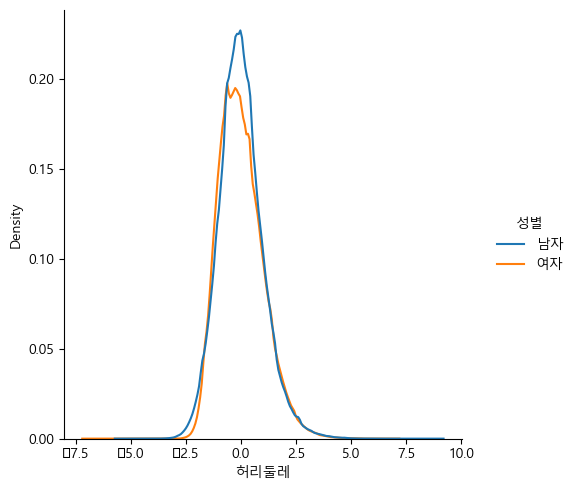

In [125]:
sns.displot(
    df_standard,
    x='허리둘레',
    hue='성별',
    kind='kde',
)

In [126]:
min_max_scaler = MinMaxScaler()
man_min_max = min_max_scaler.fit_transform(man)

In [127]:
man_min_max = pd.DataFrame(man_min_max, columns=['허리둘레'])
man_min_max['성별'] = '남자'

In [131]:
min_max_scaler = MinMaxScaler()
woman_min_max = min_max_scaler.fit_transform(woman)

In [132]:
woman_min_max = pd.DataFrame(woman_min_max, columns=['허리둘레'])
woman_min_max['성별'] = '여자'

In [134]:
df_min_max = pd.concat([man_min_max, woman_min_max])

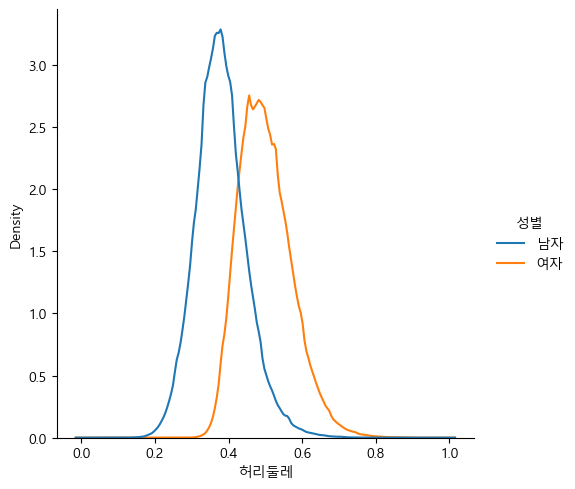

In [145]:
sns.displot(
    df_min_max,
    x='허리둘레',
    hue='성별',
    kind='kde',
)

In [157]:
# 삼성전자 주식 데이터 사용, numpy를 이용하여 10일 이동평균(종가) 계산
samsung_stock_price = pd.read_csv(
    './data/samsung.csv',
    usecols=['일자', '종가'],
    encoding='cp949',
).sort_values(['일자']).set_index(['일자'])
# 전체 구간을 3등분하여 train, valid, test set을 구성하려고 한다
train, valid, test = np.array_split(samsung_stock_price, 3)

# standard scaler를 사용하여 scaling을 진행하려고 한다
standard_scaler = StandardScaler()
train.loc[:] = standard_scaler.fit_transform(train)
valid.loc[:] = standard_scaler.transform(valid)
test.loc[:] = standard_scaler.transform(test)

# 이 때 데이터는 train, valid, test 내에서 이동평균을 학습하려고 하며
train_sliding_view = np.lib.stride_tricks.sliding_window_view(train.종가, 10)
train_mean_average = train_sliding_view.mean(axis=1)

valid_sliding_view = np.lib.stride_tricks.sliding_window_view(valid.종가, 10)
valid_mean_average = valid_sliding_view.mean(axis=1)

test_sliding_view = np.lib.stride_tricks.sliding_window_view(test.종가, 10)
test_mean_average = test_sliding_view.mean(axis=1)


#  이동평균의 경우 1, 2, 3, 4, 5, 6, 7에서 window가 5일 때,
# 1은 1까지의 평균
# 2는 2까지의 평균
# 3은 3까지의 평균
# 4는 4까지의 평균으로 결측치를 채우려고 한다

# 완성된 이동평균을 시계열 그림으로 출력하라

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



In [171]:
x = np.tril(train.종가[:9].values)
x = np.nanmean(np.where(x == 0, np.nan, x), axis=-1)

In [172]:
train_mean_average = train_sliding_view.mean(axis=1)

In [174]:
x = np.concatenate([x, train_mean_average])

In [176]:
train.shape

(82, 1)

In [175]:
x.shape

(82,)